#Librerías  

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

#Transformación de variables categoricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


#Modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 



#Cargar datos 

In [2]:
df = pd.read_csv('train-data.csv')


In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


#Características  


##Limpieza de datos

In [6]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

**Eliminar columnas**

In [7]:
#Eliminar las características que contienen un 70% de datos nulos
df = df.dropna(thresh=df.shape[0]*0.7, how='all',axis=1)
df.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [8]:
#Eliminar la columna de indice
df = df.drop(columns='Unnamed: 0')
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


In [9]:
df.dropna(inplace = True)
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
df.shape

(5975, 12)

##Cambiar el formato y el tipo de datos


In [11]:
df['Mileage'] = pd.to_numeric(df['Mileage'].str.lower().str.split().str.get(0), errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.lower().str.split().str.get(0), errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.lower().str.split().str.get(0), errors='coerce')


In [12]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 606.8+ KB


Ahora, sustituimos los valores nulos así como "0.0" por la media de los datos no nulos de sus respectivas columnas (Kilometraje, Motor, Potencia y Asiento)

In [14]:
df['Mileage'].replace(0.0,np.nan,inplace=True)
print("Media del kilometraje =",np.mean(df['Mileage']))
df['Mileage'].fillna(value=np.mean(df['Mileage']),inplace=True)

Media del kilometraje = 18.35140395337055


In [15]:
df['Engine'].replace(0.0,np.nan,inplace=True)
print("Media del motor =",np.mean(df['Engine']))
df['Engine'].fillna(value=np.mean(df['Engine']),inplace=True)

Media del motor = 1621.6066945606694


In [16]:
df['Power'].replace(0.0,np.nan,inplace=True)
print("Media de potencia =",np.mean(df['Power']))
df['Power'].fillna(value=np.mean(df['Power']),inplace=True)

Media de potencia = 113.27689373296914


In [17]:
df['Seats'].replace(0.0,np.nan,inplace=True)
print("Media de asientos = ",np.mean(df['Seats']))
df['Seats'].fillna(value=np.mean(df['Seats']),inplace=True)

Media de asientos =  5.279712085704721


In [18]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   int64  
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 606.8+ KB


##Eliminación de valores atípicos mediante la lógica empresarial

Normalmente el kilometraje es de 5KM/L (es decir, si tiene, por ejemplo, menos de 5 KM/L, eso parece sospechoso y se puede eliminar como un valor atípico). Eliminaremos estos valores atípicos manteniendo nuestro kilometraje máximo por litro.

In [20]:
df[df.Mileage<5].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


No existen valores atípicos en la característica 

normalmente el kilometraje es de 1 millón de KM (es decir, si usted tiene, por ejemplo, más de 1 millón de KM, parece sospechoso y puede ser eliminado como un valor atípico). Eliminaremos estos valores atípicos manteniendo nuestro máximo de kilómetros recorridos.

In [21]:
df[df['Kilometers_Driven'] > 1000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993,258.0,5.0,65.0


Tenemos 65Millones de Kilómetros Recorridos y no es posible. Así que vamos a manejar este valor atípico utilizando la media de Kilometer_Driven

In [22]:
kilometers_driven_mean = df['Kilometers_Driven'].mean()
df['Kilometers_Driven'] = [i  if i < 1000000 else float(int(kilometers_driven_mean)) for i in df.Kilometers_Driven]

In [23]:
df['Kilometers_Driven'].max()

775000.0

In [24]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

##Variables categoricas

**Identificación de datos categóricos: Nominal, Ordinal y Continuo**

**Estandarización de marcas**

Establecer las marcas más importantes y eliminar las variantes que existen 

In [25]:
len(df['Name'].unique())

1855

In [26]:
def name(x):
    return x.split(' ')[:1][0]

In [27]:
df['Brand'] = df['Name'].apply(name)

In [28]:
brand_count = df['Brand'].value_counts()
b_count = brand_count[brand_count <= 89]

In [29]:
def remove_brands(x):
    if x in b_count:
        return False
    else:
        return True

In [30]:
df = df[df['Brand'].apply(remove_brands)]

In [31]:
df.shape

(5723, 13)

In [32]:
selected_brand_count = df['Brand'].value_counts()
sb_count = selected_brand_count[selected_brand_count >= 235]

In [33]:
sb_count

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Name: Brand, dtype: int64

In [34]:
def filter_brands(x):
    if x in sb_count:
        return x
    else:
        return 'Others'

In [35]:
df['Brand'] = df['Brand'].apply(filter_brands)

In [36]:
df['Brand'].value_counts()

Maruti           1197
Hyundai          1100
Others            716
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Name: Brand, dtype: int64

In [116]:
df.drop('Name',axis=1,inplace=True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,12,72000.0,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti
1,Pune,7,41000.0,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Chennai,11,46000.0,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda
3,Chennai,10,87000.0,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,9,40670.0,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,8,27365.0,Diesel,Manual,First,28.40,1248,74.00,5.0,4.75,Maruti
6015,Jaipur,7,100000.0,Diesel,Manual,First,24.40,1120,71.00,5.0,4.00,Hyundai
6016,Jaipur,10,55000.0,Diesel,Manual,Second,14.00,2498,112.00,8.0,2.90,Mahindra
6017,Kolkata,9,46000.0,Petrol,Manual,First,18.90,998,67.10,5.0,2.65,Maruti


In [38]:
len(df['Brand'].unique())

11

In [39]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

In [40]:
print(df['Brand'].value_counts())
print(df['Location'].value_counts())
print(df['Fuel_Type'].value_counts())
print(df['Transmission'].value_counts())
print(df['Owner_Type'].value_counts())

Maruti           1197
Hyundai          1100
Others            716
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Name: Brand, dtype: int64
Mumbai        755
Hyderabad     705
Kochi         612
Coimbatore    601
Pune          592
Delhi         522
Kolkata       511
Chennai       475
Jaipur        398
Bangalore     334
Ahmedabad     218
Name: Location, dtype: int64
Diesel    2999
Petrol    2658
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64
Manual       4184
Automatic    1539
Name: Transmission, dtype: int64
First             4706
Second             905
Third              104
Fourth & Above       8
Name: Owner_Type, dtype: int64


Según los resultados anteriores aquí podemos dividir Nominal y Ordinal

In [41]:
# Convertir la variable del año en edad
df['Year'] = 2022-df['Year']

##Análisis de los datos

**FACTORES QUE AFECTAN AL PRECIO**

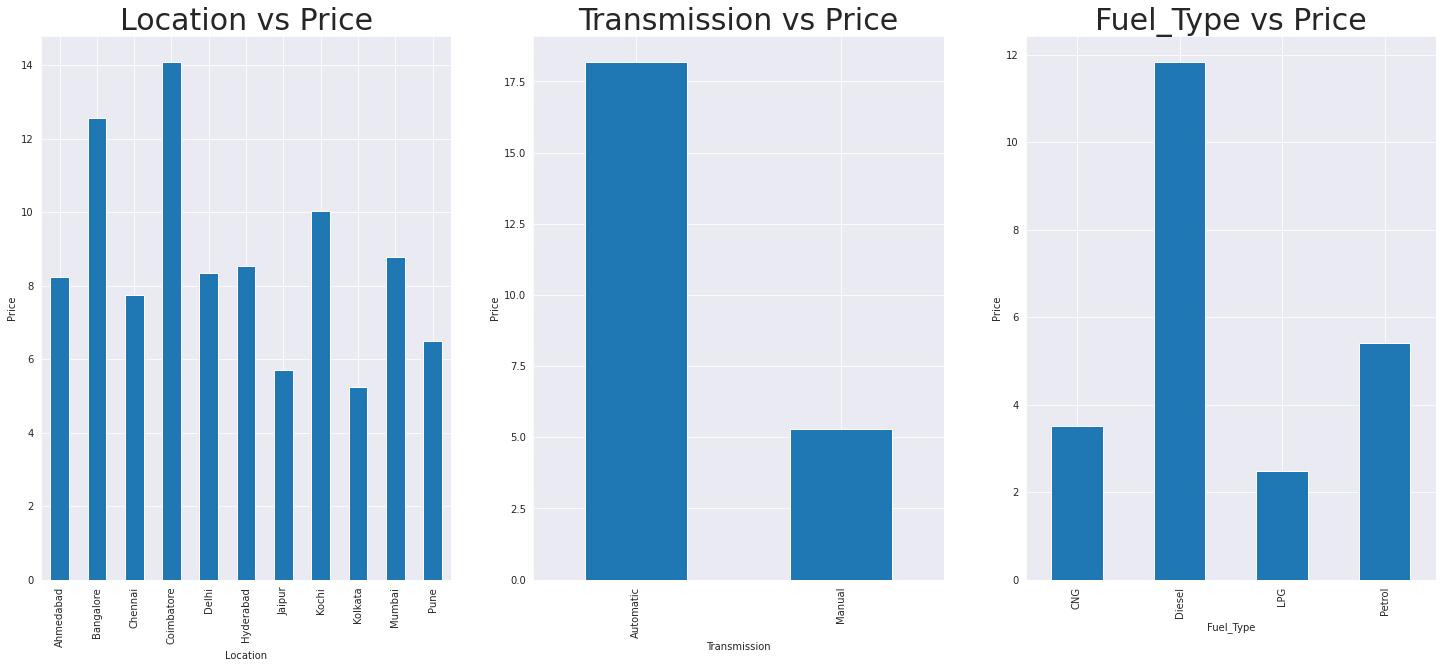

In [59]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Location vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Location')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Transmission vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Transmission')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Fuel_Type vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Fuel_Type')['Price'].mean().plot.bar()



*   Los autos de Coimbatore tienen el precio máximo y Kolkata tiene el auto de precio mínimo.

*   Los autos automáticos tienen más precio que los manuales.
*   Los autos a diésel tienen el mayor precio, y los coches de LPG tienen el precio más bajo.

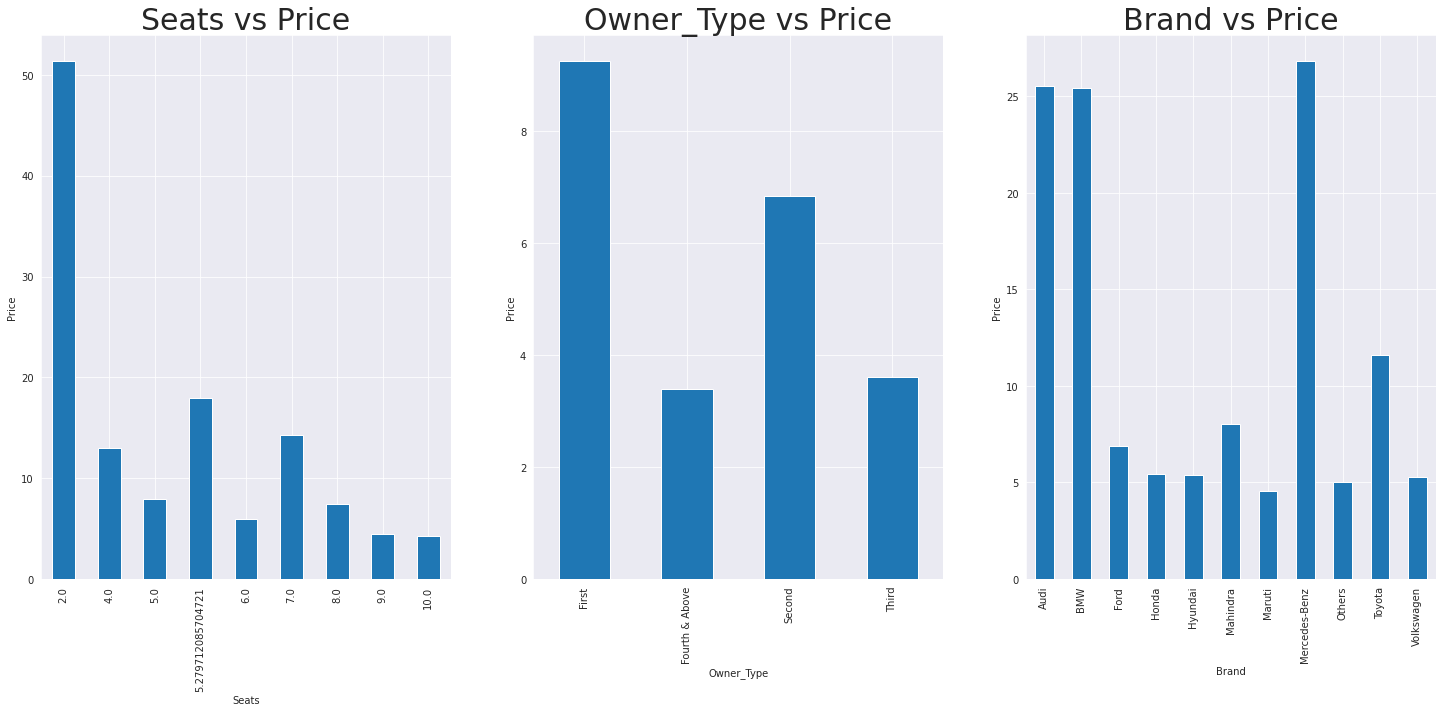

In [60]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Seats vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Seats')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Owner_Type vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Owner_Type')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Brand vs Price',fontsize = 30)
plt.ylabel("Price")
df.groupby('Brand')['Price'].mean().plot.bar()



*   Los autos de 2 asientos resultan ser los que tienen el valor máximo en el precio 
*   Los autos que pertenecen a los vendedores de primera mano tienen el mayor precio a comparación de los vendedores de cuarta o superior  
*   La marca con mayor precio pertenece a Mercedes-Benz 



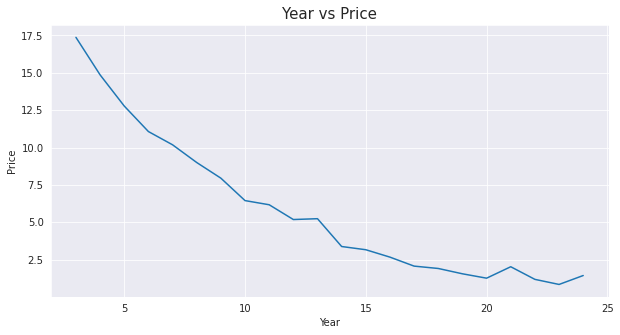

In [61]:
plt.figure(figsize=(10,5))
plt.title('Year vs Price',fontsize = 15)
plt.ylabel("Price")
df.groupby('Year')['Price'].mean().plot.line()

Los autos más nuevos son más costosos a comparación de los autos que tienen más de 10 años en el mercado.  

##Utilizar On Hot Encoding para las variables categóricas

El primer paso es utilizar el codificador de etiquetas para convertir los nombres en números

In [42]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,12,72000.0,CNG,Manual,First,26.60,998,58.16,5.0,1.75,Maruti
1,Pune,7,41000.0,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50,Hyundai
2,Chennai,11,46000.0,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50,Honda
3,Chennai,10,87000.0,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,9,40670.0,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74,Audi


In [62]:
brand_dummies = pd.get_dummies(df['Brand'])
location_dummies = pd.get_dummies(df['Location'])
fuel_type_dummies = pd.get_dummies(df['Fuel_Type'])
transmission_dummies = pd.get_dummies(df['Transmission'])
owner_type_dummies = pd.get_dummies(df['Owner_Type'])

Recogida de datos en un marco de datos

In [63]:
# Crear un nuevo marco de datos con variables numéricas
features = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [64]:
df_ohe = pd.concat([features, brand_dummies,location_dummies, fuel_type_dummies, transmission_dummies, owner_type_dummies], axis=1)

In [65]:
df_ohe.shape

(5723, 39)

##Guardar los datos procesados 

In [66]:
df_ohe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes-Benz,Others,Toyota,Volkswagen,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,12,72000.0,26.60,998,58.16,5.0,1.75,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
1,7,41000.0,19.67,1582,126.20,5.0,12.50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
2,11,46000.0,18.20,1199,88.70,5.0,4.50,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3,10,87000.0,20.77,1248,88.76,7.0,6.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,9,40670.0,15.20,1968,140.80,5.0,17.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,8,27365.0,28.40,1248,74.00,5.0,4.75,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
6015,7,100000.0,24.40,1120,71.00,5.0,4.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0
6016,10,55000.0,14.00,2498,112.00,8.0,2.90,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
6017,9,46000.0,18.90,998,67.10,5.0,2.65,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [67]:
df_ohe.to_csv('data-Clean.csv', index=False)

#Modelado

##Hallar X, Y

Se realiza la selección de las características y la variable de salida 


In [68]:

X = df_ohe.drop(columns='Price')
y = df_ohe.Price

In [69]:
X.shape

(5723, 38)

Se realiza un escalado MinMax a las características de kilometraje y kilómetros recorridos. Este tipo de escalado transforma las características escalándolas a un rango dado, por defecto (0,1), aunque puede ser personalizado. Este tipo de escalado suele denominarse frecuentemente "normalización" de los datos.   

In [70]:
X[['Kilometers_Driven', 'Mileage']] = MinMaxScaler().fit_transform(X[['Kilometers_Driven', 'Mileage']])    

##Dividir el dataset en training and testing 

Se dividen los datos en conjuntos de entrenamiento y prueba para poder medir el rendimiento

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

##Modelo Random Forest

In [118]:
forest_rf = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1)
forest_rf.fit(X_train, y_train)
forest_rf.score(X_test, y_test)


0.9274616054075083

**Métricas de error**

In [78]:
ytrainpredict_rf = forest_rf.predict(X_train)
ytestpredict_rf = forest_rf.predict(X_test)

In [80]:
print(f'MAE train: {metrics.mean_absolute_error(y_train, ytrainpredict_rf)}, test: {metrics.mean_absolute_error(y_test, ytestpredict_rf)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(y_train, ytrainpredict_rf))}, test: {np.sqrt(metrics.mean_squared_error(y_test, ytestpredict_rf))}')
print(f'R^2 train: {(r2_score(y_train, ytrainpredict_rf))}, test: {(r2_score(y_test, ytestpredict_rf))}')
print(f'MSE train: {(mean_squared_error(y_train, ytrainpredict_rf))}, test: {(mean_squared_error(y_test, ytestpredict_rf))}')

MAE train: 0.4657735560657027, test: 1.2442392418508643
RMSE train: 0.9811931326267359, test: 2.6410774768916303
R^2 train: 0.9900288092675736, test: 0.9274616054075083
MSE train: 0.9627399635138673, test: 6.975290238944261


**Visualización de los datos**

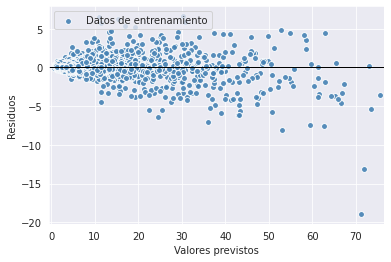

In [95]:
plt.scatter(ytrainpredict_rf, ytrainpredict_rf-y_train, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Datos de entrenamiento")
plt.xlabel('Valores previstos')
plt.ylabel('Residuos')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_rf.min()-2, xmax=ytrainpredict_rf.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_rf.min()-1, ytrainpredict_rf.max()+1])
plt.show()

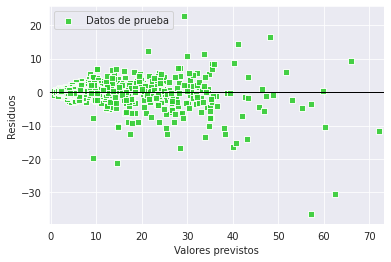

In [96]:
plt.scatter(ytestpredict_rf, ytestpredict_rf-y_test, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Datos de prueba")
plt.xlabel('Valores previstos')
plt.ylabel('Residuos')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_rf.min()-1, xmax=ytestpredict_rf.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rf.min()-1, ytestpredict_rf.max()+1])
plt.show()

##Modelo Regresión Lineal   

In [98]:
model = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=None)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7740927111715714

**Métricas de error**

In [99]:
ytrainpredict_lr = model.predict(X_train)
ytestpredict_lr = model.predict(X_test)

Evaluación del modelo mediante métricas de precisión

In [100]:
print(f'MAE train: {metrics.mean_absolute_error(y_train, ytrainpredict_lr)}, test: {metrics.mean_absolute_error(y_test, ytestpredict_lr)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(y_train, ytrainpredict_lr))}, test: {np.sqrt(metrics.mean_squared_error(y_test, ytestpredict_lr))}')
print(f'R^2 train: {(r2_score(y_train, ytrainpredict_lr))}, test: {(r2_score(y_test, ytestpredict_lr))}')
print(f'MSE train: {(mean_squared_error(y_train, ytrainpredict_lr))}, test: {(mean_squared_error(y_test, ytestpredict_lr))}')

MAE train: 2.636879058121641, test: 2.653786319876599
RMSE train: 4.619750005566623, test: 4.660819599005653
R^2 train: 0.7789579126039978, test: 0.7740927111715714
MSE train: 21.34209011393282, test: 21.723239334475217


**Visualización de los datos**

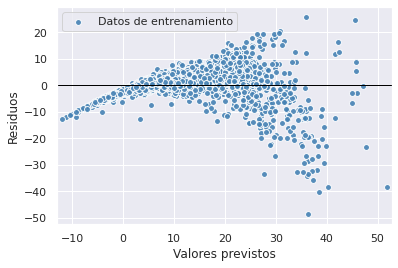

In [101]:
sns.set(font_scale=1.0)
plt.scatter(ytrainpredict_lr, ytrainpredict_lr - y_train, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Datos de entrenamiento")
plt.xlabel('Valores previstos')
plt.ylabel('Residuos')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_lr.min()-2, xmax=ytrainpredict_lr.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_lr.min()-1, ytrainpredict_lr.max()+1])
plt.show()

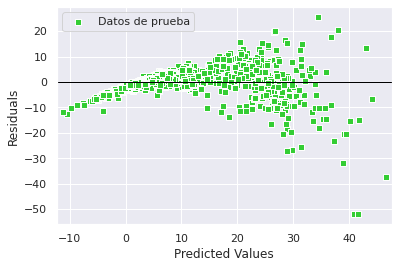

In [102]:
plt.scatter(ytestpredict_lr, ytestpredict_lr-y_test, c='limegreen', marker='s', edgecolors='white', s=30, alpha=0.99, label="Datos de prueba")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_lr.min()-1, xmax=ytestpredict_lr.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_lr.min()-1, ytestpredict_lr.max()+1])
plt.show()

##Modelo Arboles de decisión    

In [114]:
dt= DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=None)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)


0.8716690173339465

**Métricas de error**

In [105]:
ytrainpredict_dt = dt.predict(X_train)
ytestpredict_dt = dt.predict(X_test)

In [106]:
print(f'MAE train: {metrics.mean_absolute_error(y_train, ytrainpredict_dt)}, test: {metrics.mean_absolute_error(y_test, ytestpredict_dt)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(y_train, ytrainpredict_dt))}, test: {np.sqrt(metrics.mean_squared_error(y_test, ytestpredict_dt))}')
print(f'R^2 train: {(r2_score(y_train, ytrainpredict_dt))}, test: {(r2_score(y_test, ytestpredict_dt))}')
print(f'MSE train: {(mean_squared_error(y_train, ytrainpredict_dt))}, test: {(mean_squared_error(y_test, ytestpredict_dt))}')

MAE train: 0.0013163587951406212, test: 1.6328683750728012
RMSE train: 0.02440999579730463, test: 3.469392411798812
R^2 train: 0.999993828745838, test: 0.8748264685171072
MSE train: 0.0005958478948244297, test: 12.036683707047176


**Visualización de los datos**

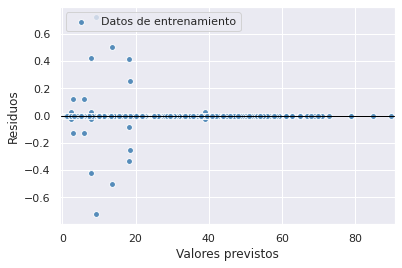

In [107]:
sns.set(font_scale=1.0)
plt.scatter(ytrainpredict_dt, ytrainpredict_dt - y_train, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Datos de entrenamiento")
plt.xlabel('Valores previstos')
plt.ylabel('Residuos')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_dt.min()-2, xmax=ytrainpredict_dt.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_dt.min()-1, ytrainpredict_dt.max()+1])
plt.show()

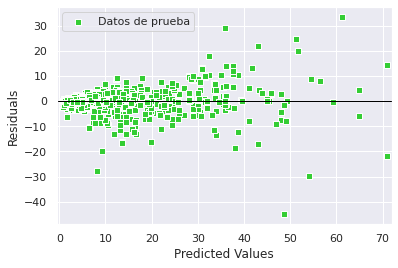

In [110]:
plt.scatter(ytestpredict_dt, ytestpredict_dt-y_test, c='limegreen', marker='s', edgecolors='white', s=30, alpha=0.99, label="Datos de prueba")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_dt.min()-1, xmax=ytestpredict_dt.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_dt.min()-1, ytestpredict_dt.max()+1])
plt.show()

##Comparación de los algoritmos de regresión

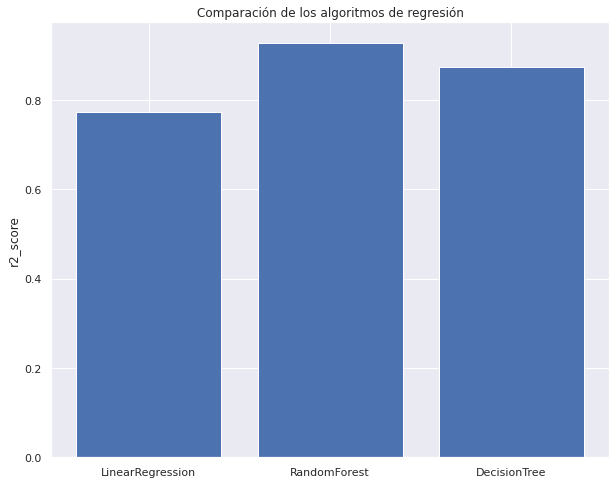

In [111]:
plt.figure(figsize=(10,8))
y = np.array([r2_score(y_test,ytestpredict_lr),r2_score(y_test,ytestpredict_rf),r2_score(y_test,ytestpredict_dt)])
x = ["LinearRegression","RandomForest","DecisionTree"]
plt.bar(x,y)
plt.title("Comparación de los algoritmos de regresión")
plt.ylabel("r2_score")
plt.show()